# Importing Libraries

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
from matplotlib import cm
# selecting colors
pie = ['#e1b166','#99ce3e']
target_color = ['#022930','#650000']
pie_2 = ['#e1b166','#99ce3e','#66cfd6']
plot = ['#66cdaa','#468499']
rating = ['#e1b166','#99ce3e','#66cfd6','#66cdaa','#468499','#022930']

## Importing data sets

In [4]:
test = pd.read_csv('test.csv')
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
train = pd.read_csv('train.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Target Distribution

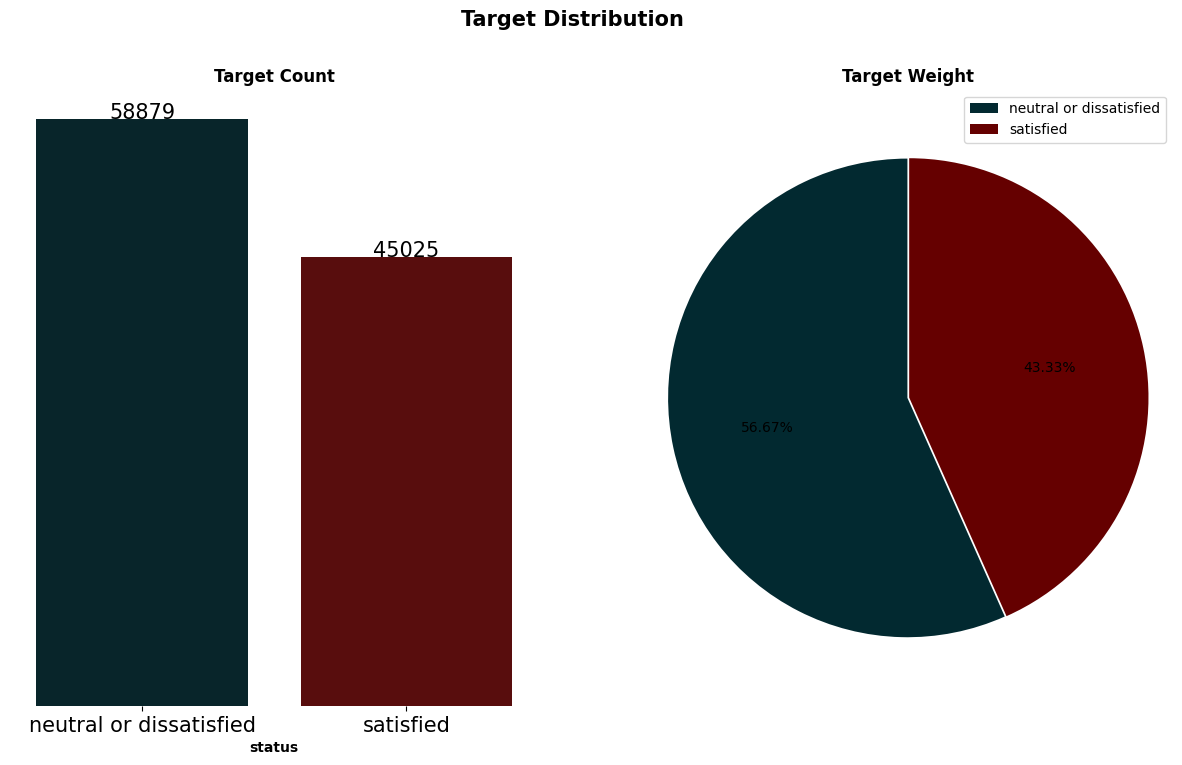

In [6]:
#define the figure (bar)
fig = plt.figure(figsize = (15,8))
plt.suptitle('Target Distribution', weight = 'bold', size = 15)

# to separate two figure 
grid = gridspec.GridSpec(nrows = 1, ncols = 2, figure = fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Target Count', weight = 'bold')

#with the help of seaborn preparing a countplot
sns.countplot(x = 'satisfaction', data = train, ax=ax1, hue = 'satisfaction',palette =target_color)

# removing the y-axis
ax1.get_yaxis().set_visible(False)

#To remove the border from the bar plot 
for spine in ax1.spines.values():
    spine.set_visible(False)

#To show the value above the bars 
for index,value in enumerate(train['satisfaction'].value_counts()):
    ax1.annotate(value,xy=(index,value+1600),ha = 'center', va = 'top' , size = 15) 

plt.xlabel('status', weight = 'bold')
plt.xticks(size = 15)
plt.ylabel('satisfaction count', weight = 'bold')



# define the 2 figure (pie)
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight', weight = 'bold')
label = list(train['satisfaction'].value_counts().index)
value = list(train['satisfaction'].value_counts().values)

# to show the pie 
ax2.pie(value, autopct = '%1.2f%%', explode = (0,0.0075), startangle = 90, colors = target_color)
ax2.legend(label)
ax2.axis('equal')
plt.show()

#### From the Target Distribution plot it is shown that around 58000+ or 56.10% customers are neutral or dissatisfied by the airline services 

# Passengers profile

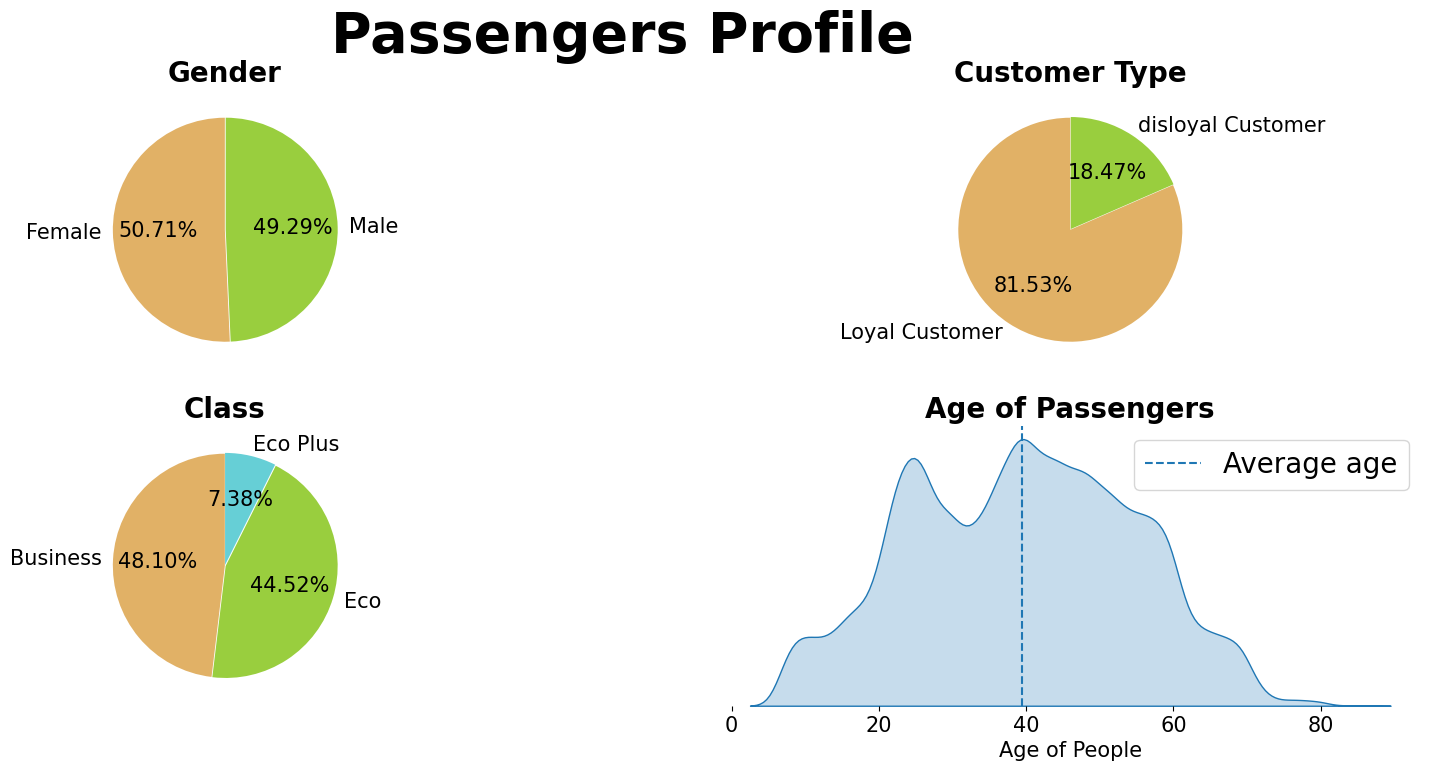

In [7]:
#GENDER

#defining the figure
fig = plt.figure(figsize = (20,8))
plt.suptitle('Passengers Profile', weight = 'bold', size = 40)
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)
ax1 = fig.add_subplot(grid[0,:1])

#pie chart
ax1.set_title('Gender', weight = 'bold',  size = 20)
label = list(test['Gender'].value_counts().index)
value = list(test['Gender'].value_counts().values)


# to show the pie 
ax1.pie(value, labels=label, autopct = '%1.2f%%', explode = (0,0.0075), startangle = 90, colors = pie,textprops={'fontsize': 15})

# second plot 

#TYPE OF TRAVEL
#pie 
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', weight = 'bold', size = 20)
label1 = list(test['Customer Type'].value_counts().index)
value1 = list(test['Customer Type'].value_counts().values)
ax2.pie(value1, autopct = '%1.2f%%', labels = label1,explode = (0,0.0075), startangle = 90, colors = pie, textprops={'fontsize': 15})
# third plot

# CLASS TYPE OF TRAVELLING
#pie
ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Class', weight = 'bold', size = 20)
label2 = list(test['Class'].value_counts().index)
value2 = list(test['Class'].value_counts().values)
ax3.pie(value2, autopct = '%1.2f%%', labels = label2,explode = (0,0.0075,0.0075), startangle = 90, colors = pie_2, textprops={'fontsize': 15})

# fourth plot
# age of passengers
ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age of Passengers', size = 20, weight = 'bold')

# area chart plot
sns.kdeplot(train['Age'], ax=ax4, fill = True)

#removing the borders on the plot
for spine in ax4.spines.values():
    spine.set_visible(False)
ax4.get_yaxis().set_visible(False)
plt.xticks(size = 15)
ax4.set_xlabel('Age of People', size = 15)
ax4.set_ylabel('Density', size = 15)

#showing the mean line in the plot
ax4.axvline(train['Age'].mean(), linestyle = '--', label = 'Average age')
ax4.legend(fontsize = 20)

plt.show()

#### From the Passengers Profile
#### 1. Females have high percentage of travelling through flights than males.
#### 2. It shows the number of loyal customers are more frequent.
#### 3. Business-class is prominent among customer when they decide to travel which is followed by Eco-class and very less number of peoples have decided to travel through Eco Plus-class.
#### 4. People belongs to the age group of 39yrs are more in numbers who are actively participating in the survey and travel the most.

# People satisfaction level

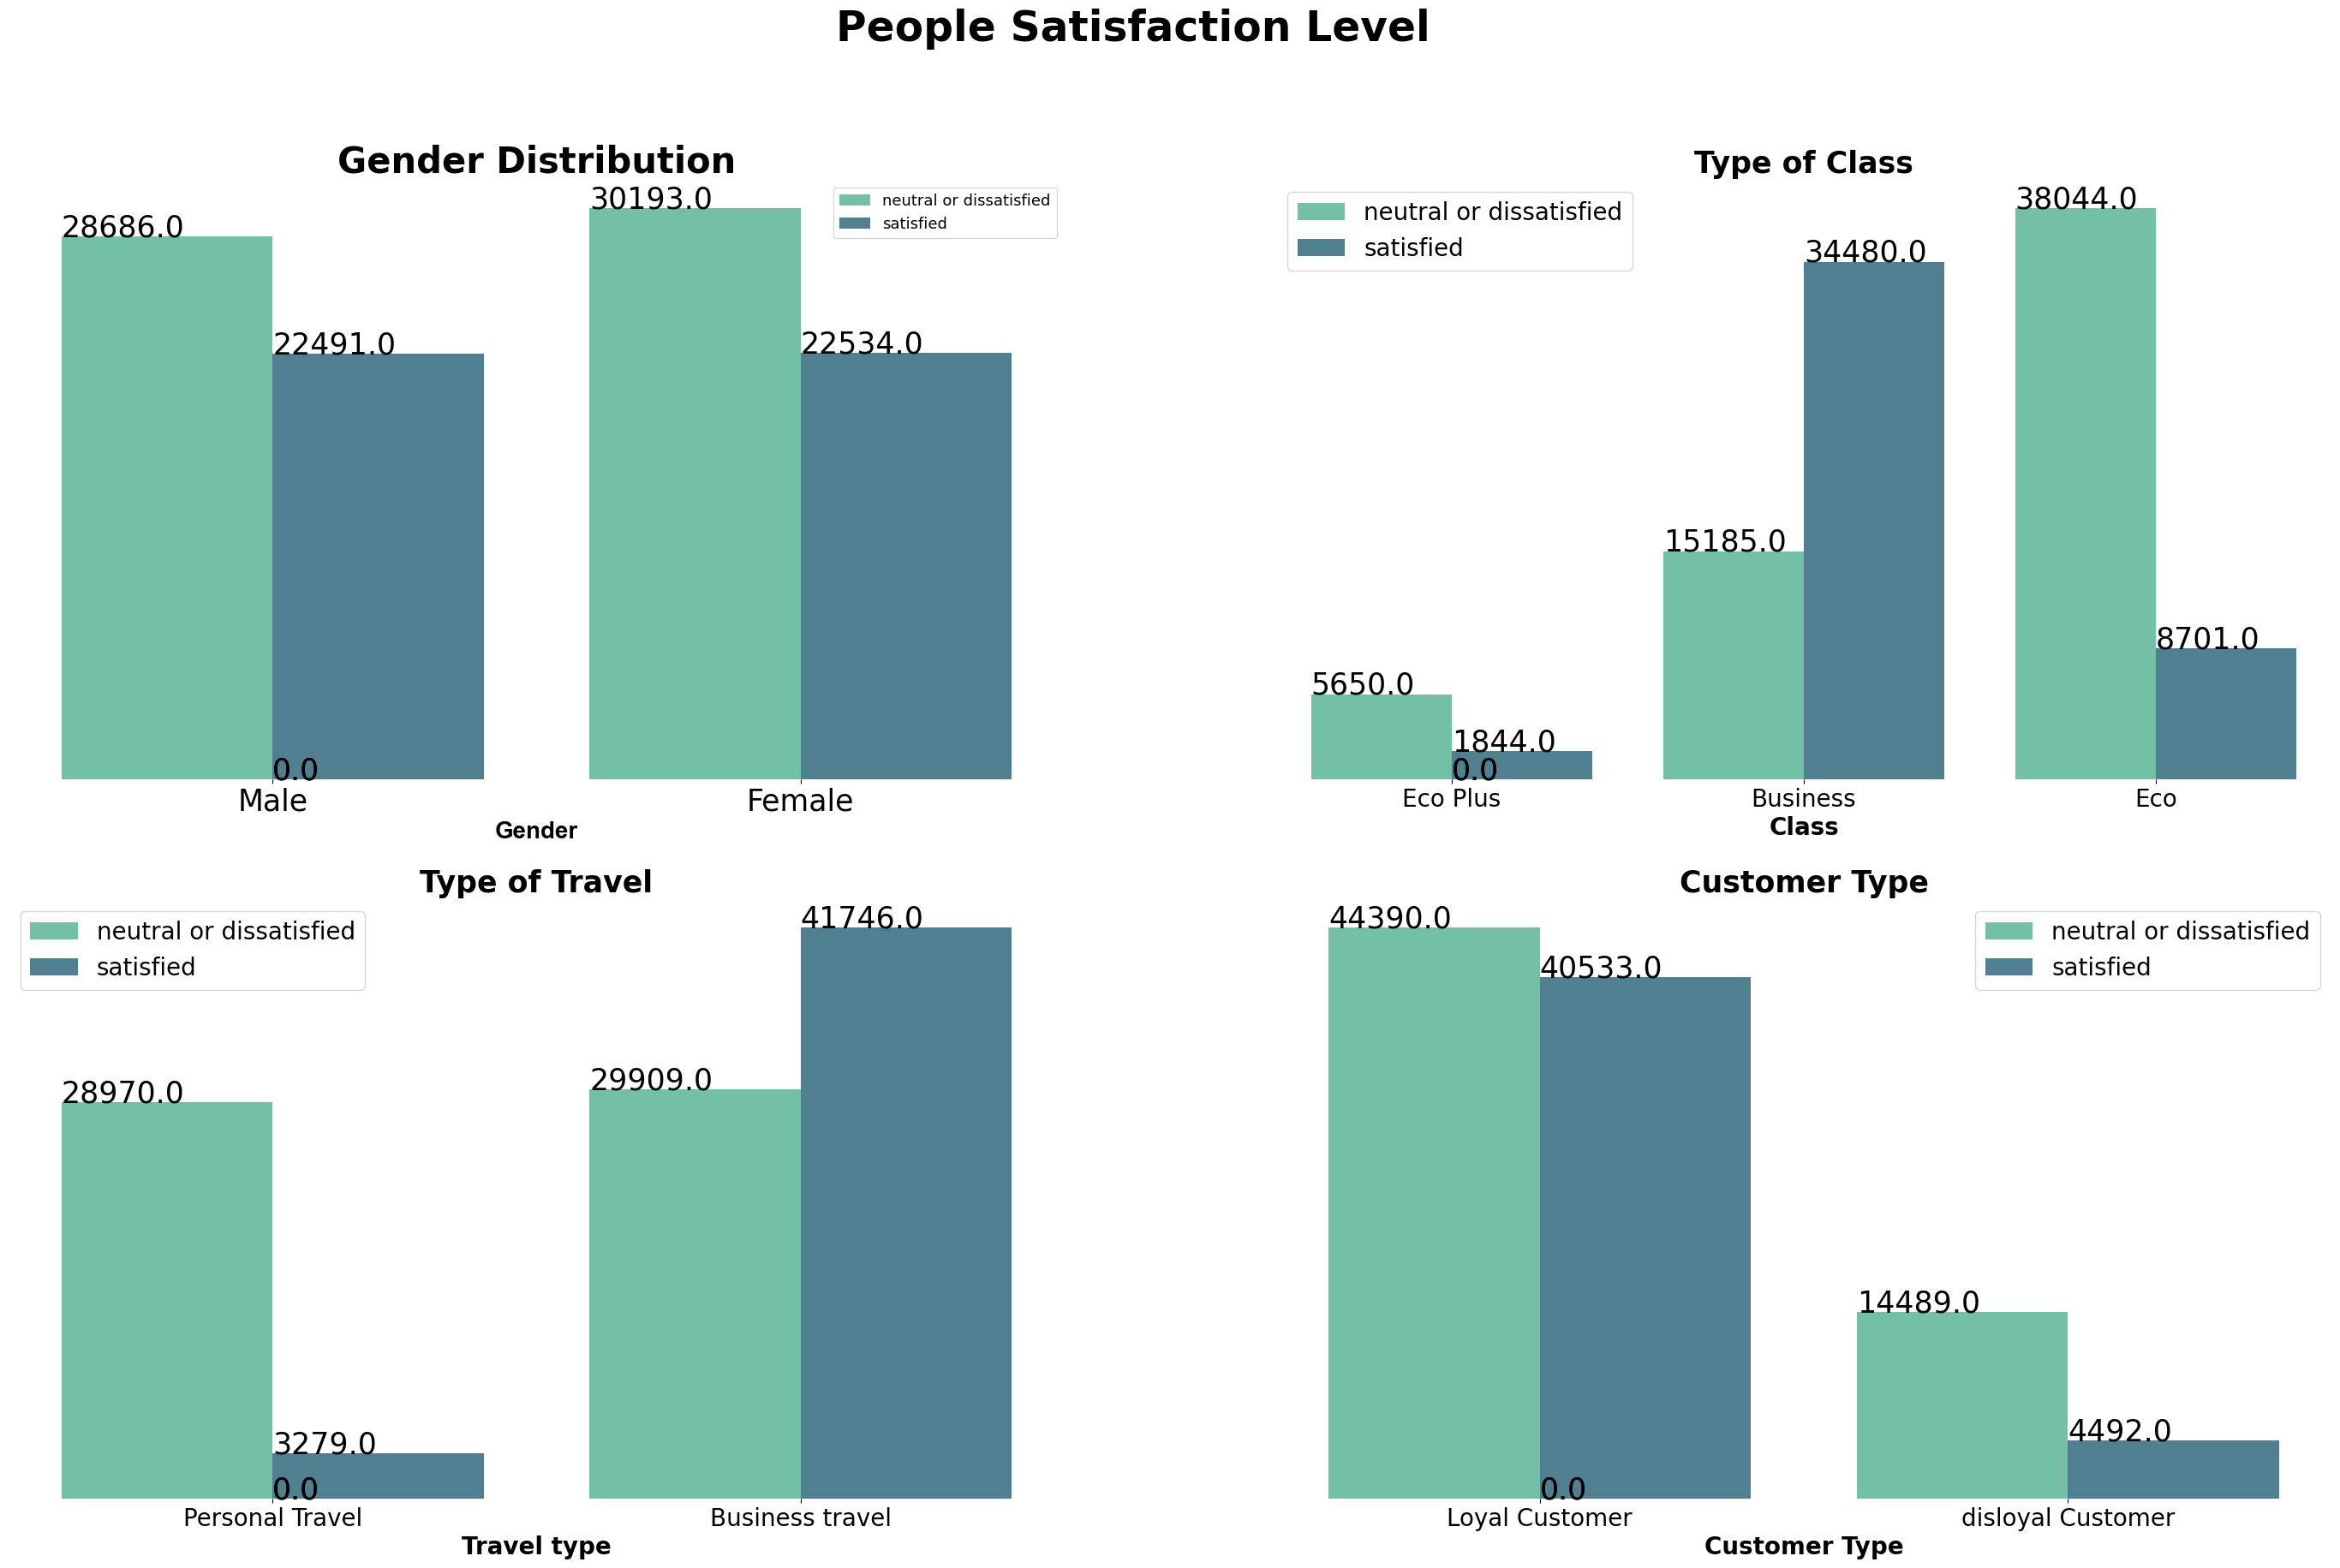

In [8]:
#define the figure
fig = plt.figure(figsize = (35,20))
grid2 = gridspec.GridSpec(nrows = 2, ncols = 2 , figure = fig)
plt.suptitle('People Satisfaction Level', weight = 'bold', size = 35)

# First plot

# Satisfaction or Dissatisfaction level according to the gender
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender Distribution', weight = 'bold', size = 30)

# preparing a countplot
sns.countplot(x = train['Gender'], hue=train['satisfaction'], ax=ax1, data = train, palette = plot)

#removing the borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# showing values using patches function in for loop
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()),(p.get_x(),p.get_height()), size = 25)

# removing the y-axis
ax1.get_yaxis().set_visible(False)

# plot settings 
plt.xlabel('Gender', fontsize = 20, weight = 'bold', font = 'arial')
plt.xticks(fontsize = 25)
plt.legend(fontsize = 13)

# Second plot

# Type of class 

# define the figure 
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Type of Class', weight = 'bold', size = 25)

#preparing a countplot
sns.countplot(x = 'Class', data = train, hue = 'satisfaction', palette = plot)

#editing the plot 
for spine in ax2.spines.values():
    spine.set_visible(False)

for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()),(p.get_x(),p.get_height()),size = 25)

ax2.get_yaxis().set_visible(False)
plt.legend(fontsize  = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Class', size = 20, weight = 'bold', font = 'sans')

# Third plot

# Type of Travel

# define the figure 
ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Type of Travel', weight = 'bold', size = 25)

#preparing a countplot
sns.countplot(x = 'Type of Travel', data = train, hue = 'satisfaction', palette = plot)

#editing the plot 
for spine in ax3.spines.values():
    spine.set_visible(False)

for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()),(p.get_x(),p.get_height()),size = 25)

ax3.get_yaxis().set_visible(False)
plt.legend(fontsize  = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Travel type', size = 20, weight = 'bold', font = 'sans')

#Fourth plot

# Customers

# define the figure 
ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Customer Type', weight = 'bold', size = 25)

#preparing a countplot
sns.countplot(x = 'Customer Type', data = train, hue = 'satisfaction', palette = plot)

#editing the plot 
for spine in ax4.spines.values():
    spine.set_visible(False)

for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()),(p.get_x(),p.get_height()),size = 25)

ax4.get_yaxis().set_visible(False)
plt.legend(fontsize  = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Customer Type', size = 20, weight = 'bold', font = 'sans')

plt.show()


### From People Satisfaction level
#### 1. Satisfaction level according to the Gender shows that Females are more dissatisfied than Males.
#### 2. Satisfaction level according to the Class of Travel shows that people travelling through business class are highly satisfied but those who are travel through eco and eco-plus class are highly dissatisfied.
#### 3. Satisfaction level according to the Type of Travel shows that people who have travel related to their business are highly satisfied but people who are travelling for thier own purposes are highly dissatisfied.
#### 4. Satisfaction level according to the Customer Type shows that loyal customers are dissatisfied with the services which can turn out to be a very serious problem for the airline. 

# Ratings by the Passengers


### 1. Ratings for the Ease of Online Booking.

In [9]:
train['Ease of Online booking']

0         3
1         3
2         2
3         5
4         3
         ..
103899    2
103900    4
103901    1
103902    1
103903    3
Name: Ease of Online booking, Length: 103904, dtype: int64

In [10]:
train['Ease of Online booking'].value_counts().sort_values(ascending = True)

Ease of Online booking
0     4487
5    13851
1    17525
4    19571
2    24021
3    24449
Name: count, dtype: int64

#### Changing numbers to general rating term 

In [64]:
ratings = {0:'Not reported',
           1:'Very Bad',
           2:'Bad',
           3:'Good',
           4:'Very Good',
           5:'Excellent'}
ratings

{0: 'Not reported',
 1: 'Very Bad',
 2: 'Bad',
 3: 'Good',
 4: 'Very Good',
 5: 'Excellent'}

In [12]:
#mapping the general term of ratings to the column
ratings_of_online_booking = train['Ease of Online booking'].map(ratings)

In [13]:
ratings_of_online_booking.value_counts()

Ease of Online booking
Good            24449
Bad             24021
Very Good       19571
Very Bad        17525
Excellent       13851
Not reported     4487
Name: count, dtype: int64

In [14]:
#converting values into percentages 
percentage_of_ratings = ratings_of_online_booking.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
percentage_of_ratings.sort_values(ascending = False)

Ease of Online booking
Not reported     4.32%
Good            23.53%
Bad             23.12%
Very Good       18.84%
Very Bad        16.87%
Excellent       13.33%
Name: proportion, dtype: object

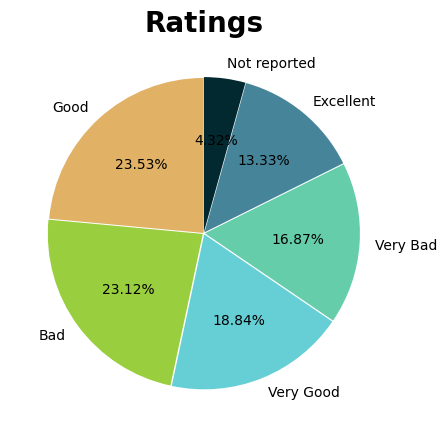

In [65]:
#creating a visulailzation for ratings 
fig = plt.figure(figsize = (5,8))
ax1 = fig.add_subplot()
ax1.set_title('Ratings', weight = 'bold', size = 20)
value1 = list(train['Ease of Online booking'].value_counts().values)
labels = list(train['Ease of Online booking'].map(ratings).value_counts().index)

ax1.pie(value1, autopct = '%1.2f%%',labels = labels, startangle = 90, colors = rating, explode = (0.0025,0.0075,0.0075,0.0075,0.0075,0.0075))

plt.show()

#### Ratings shows that customers give 'Good' ratings to Ease of Online booking.

### 2. Ratings for the Food and drink.

In [42]:
train['Food and drink']

0         5
1         1
2         5
3         2
4         4
         ..
103899    2
103900    2
103901    4
103902    1
103903    1
Name: Food and drink, Length: 103904, dtype: int64

In [43]:
train['Food and drink'].value_counts().sort_values(ascending = True)

Food and drink
0      107
1    12837
2    21988
3    22300
5    22313
4    24359
Name: count, dtype: int64

In [44]:
ratings = {0:'Not reported',
           1:'Very Bad',
           2:'Bad',
           3:'Good',
           4:'Very Good',
           5:'Excellent'}
ratings

{0: 'Not reported',
 1: 'Very Bad',
 2: 'Bad',
 3: 'Good',
 4: 'Very Good',
 5: 'Excellent'}

In [45]:
#mapping the general term of ratings to the column
ratings_of_Food_and_drink = train['Food and drink'].map(ratings)

In [46]:
ratings_of_Food_and_drink.value_counts()

Food and drink
Very Good       24359
Excellent       22313
Good            22300
Bad             21988
Very Bad        12837
Not reported      107
Name: count, dtype: int64

In [47]:
#converting values into percentages 
percentage_of_ratings = ratings_of_Food_and_drink.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
percentage_of_ratings.sort_values(ascending = False)

Food and drink
Very Good       23.44%
Excellent       21.47%
Good            21.46%
Bad             21.16%
Very Bad        12.35%
Not reported      0.1%
Name: proportion, dtype: object

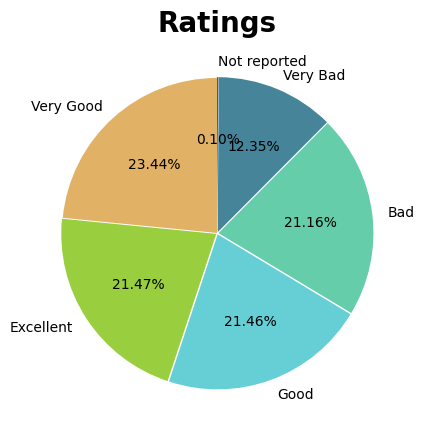

In [48]:
#creating a visulailzation for ratings 
fig = plt.figure(figsize = (5,8))
ax1 = fig.add_subplot()
ax1.set_title('Ratings', weight = 'bold', size = 20)
value1 = list(train['Food and drink'].value_counts().values)
labels = list(train['Food and drink'].map(ratings).value_counts().index)

ax1.pie(value1, autopct = '%1.2f%%',labels = labels, startangle = 90, colors = rating, explode = (0.0025,0.0075,0.0075,0.0075,0.0075,0.0075))

plt.show()

#### Ratings shows that customers give 'Very Good' ratings to Food and drink. Also there are 21.16% peoples who give bad rating to the food and drinks provied

### 3. Ratings for the On-board service.


In [55]:
train['On-board service']

0         4
1         1
2         4
3         2
4         3
         ..
103899    3
103900    5
103901    3
103902    4
103903    1
Name: On-board service, Length: 103904, dtype: int64

In [50]:
train['On-board service'].value_counts().sort_values(ascending = True)

On-board service
0        3
1    11872
2    14681
3    22833
5    23648
4    30867
Name: count, dtype: int64

In [51]:
ratings = {0:'Not reported',
           1:'Very Bad',
           2:'Bad',
           3:'Good',
           4:'Very Good',
           5:'Excellent'}
ratings

{0: 'Not reported',
 1: 'Very Bad',
 2: 'Bad',
 3: 'Good',
 4: 'Very Good',
 5: 'Excellent'}

In [52]:
#mapping the general term of ratings to the column
ratings_of_On_board_service = train['On-board service'].map(ratings)

In [53]:
ratings_of_On_board_service.value_counts()

On-board service
Very Good       30867
Excellent       23648
Good            22833
Bad             14681
Very Bad        11872
Not reported        3
Name: count, dtype: int64

In [54]:
#converting values into percentages 
percentage_of_ratings = ratings_of_On_board_service.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
percentage_of_ratings.sort_values(ascending = False)

On-board service
Very Good       29.71%
Excellent       22.76%
Good            21.98%
Bad             14.13%
Very Bad        11.43%
Not reported      0.0%
Name: proportion, dtype: object

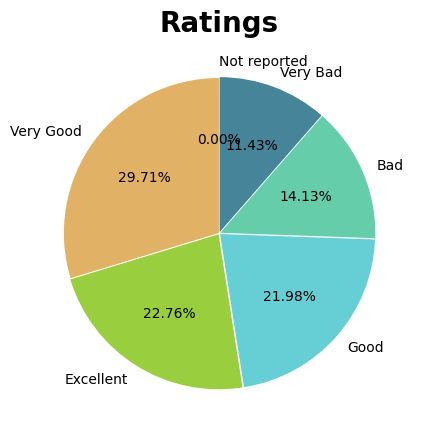

In [56]:
#creating a visulailzation for ratings 
fig = plt.figure(figsize = (5,8))
ax1 = fig.add_subplot()
ax1.set_title('Ratings', weight = 'bold', size = 20)
value1 = list(train['On-board service'].value_counts().values)
labels = list(train['On-board service'].map(ratings).value_counts().index)

ax1.pie(value1, autopct = '%1.2f%%',labels = labels, startangle = 90, colors = rating, explode = (0.0025,0.0075,0.0075,0.0075,0.0075,0.0075))

plt.show()

#### Ratings shows that customers give 'Very Good' ratings to the On-board service.

### 4. Ratings for the Cleanliness.


In [57]:
train['Cleanliness']

0         5
1         1
2         5
3         2
4         3
         ..
103899    2
103900    4
103901    4
103902    1
103903    1
Name: Cleanliness, Length: 103904, dtype: int64

In [58]:
train['Cleanliness'].value_counts().sort_values(ascending = True)

Cleanliness
0       12
1    13318
2    16132
5    22689
3    24574
4    27179
Name: count, dtype: int64

In [59]:
ratings = {0:'Not reported',
           1:'Very Bad',
           2:'Bad',
           3:'Good',
           4:'Very Good',
           5:'Excellent'}
ratings

{0: 'Not reported',
 1: 'Very Bad',
 2: 'Bad',
 3: 'Good',
 4: 'Very Good',
 5: 'Excellent'}

In [60]:
ratings_of_Cleanliness = train['Cleanliness'].map(ratings)

In [61]:
ratings_of_Cleanliness.value_counts()

Cleanliness
Very Good       27179
Good            24574
Excellent       22689
Bad             16132
Very Bad        13318
Not reported       12
Name: count, dtype: int64

In [62]:
#converting values into percentages 
percentage_of_ratings = ratings_of_Cleanliness.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
percentage_of_ratings.sort_values(ascending = False)

Cleanliness
Very Good       26.16%
Good            23.65%
Excellent       21.84%
Bad             15.53%
Very Bad        12.82%
Not reported     0.01%
Name: proportion, dtype: object

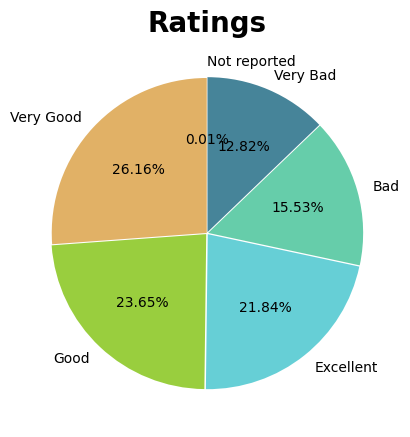

In [63]:
#creating a visulailzation for ratings 
fig = plt.figure(figsize = (5,8))
ax1 = fig.add_subplot()
ax1.set_title('Ratings', weight = 'bold', size = 20)
value1 = list(train['Cleanliness'].value_counts().values)
labels = list(train['Cleanliness'].map(ratings).value_counts().index)

ax1.pie(value1, autopct = '%1.2f%%',labels = labels, startangle = 90, colors = rating, explode = (0.0025,0.0075,0.0075,0.0075,0.0075,0.0075))

plt.show()

### Ratings shows that the airport is highly attentive to its cleanliness as most of the passengers gave 'Very Good'.